In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import wordcloud
nltk.download("stopwords")
nltk.download("wordnet")
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *


In [2]:
trump = pd.read_csv("hashtag_donaldtrump.csv",lineterminator='\n')
biden = pd.read_csv("hashtag_joebiden.csv",lineterminator='\n')

In [3]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [4]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [5]:
trump.size

15238734

In [6]:
biden.size

10496388

In [7]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725654 entries, 0 to 725653
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            725654 non-null  object 
 1   tweet_id              725654 non-null  float64
 2   tweet                 725654 non-null  object 
 3   likes                 725654 non-null  float64
 4   retweet_count         725654 non-null  float64
 5   source                724897 non-null  object 
 6   user_id               725654 non-null  float64
 7   user_name             725639 non-null  object 
 8   user_screen_name      725654 non-null  object 
 9   user_description      651481 non-null  object 
 10  user_join_date        725654 non-null  object 
 11  user_followers_count  725654 non-null  float64
 12  user_location         505267 non-null  object 
 13  lat                   342071 non-null  float64
 14  long                  342071 non-null  float64
 15  

In [8]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499828 entries, 0 to 499827
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            499828 non-null  object 
 1   tweet_id              499828 non-null  float64
 2   tweet                 499828 non-null  object 
 3   likes                 499828 non-null  float64
 4   retweet_count         499828 non-null  float64
 5   source                499239 non-null  object 
 6   user_id               499828 non-null  float64
 7   user_name             499812 non-null  object 
 8   user_screen_name      499828 non-null  object 
 9   user_description      444977 non-null  object 
 10  user_join_date        499828 non-null  object 
 11  user_followers_count  499828 non-null  float64
 12  user_location         344420 non-null  object 
 13  lat                   234867 non-null  float64
 14  long                  234867 non-null  float64
 15  

In [9]:
trump['candidate']="Trump"

In [10]:
biden['candidate']="Biden"

In [11]:
df = pd.concat([trump,biden])

In [12]:
df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499823,2020-11-05 23:59:45,1.324502e+18,Votes get “whittled down”? Counting of mail i...,0.0,0.0,Twitter for iPad,8.059161e+08,Sherry Slater,NS_Slater,"Mom of 4 great kids - hard working, proud Demo...",2012-09-06 02:58:24,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:37.074759,Biden
499824,2020-11-05 23:59:47,1.324502e+18,CONTINÚAN SALIENDO LAS PRUEBAS DEL FRAUDE ELEC...,1.0,1.0,Twitter for iPhone,4.805877e+08,Portero Mexico,PorteroMexico,NaN,2012-02-01 17:27:34,873.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:36.811037,Biden
499825,2020-11-05 23:59:50,1.324502e+18,#ElectionResults2020 #USElection #ThursdayThou...,1.0,0.0,Twitter for iPhone,2.265816e+09,VOTE EARLY! ✊🏿✊🏾✊🏽✊🏼✊🏻🏳️‍🌈🇺🇸🗽🌊Biden2020,_lolo173,If my content resonates—follow me. Resist •Pro...,2014-01-06 20:56:20,140.0,Earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:37.040510,Biden
499826,2020-11-05 23:59:54,1.324502e+18,I wonder who they’re voting for 🤔... - #fyp #f...,0.0,0.0,Instagram,8.317075e+17,NathanKTV,NathanKTV_,💁🏻‍♂️: IG 👉 NathanKTV \n🎥: 👇🏼\nhttps://t.co/o...,2017-02-15 03:31:40,0.0,"Beverly Hills, CA",34.069650,-118.396306,NaN,United States of America,North America,California,CA,2020-11-06 10:04:36.975515,Biden


In [13]:
df.size

26960604

In [16]:
#Who is most talked about
df["candidate"].value_counts()

Trump    725654
Biden    499828
Name: candidate, dtype: int64

<AxesSubplot:xlabel='candidate'>

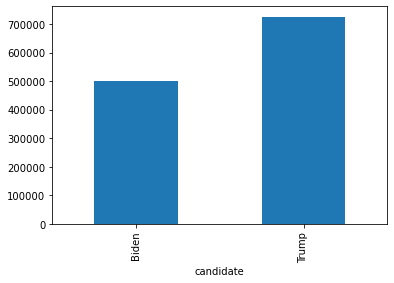

In [17]:
df.groupby('candidate')['tweet'].count().plot.bar()

<AxesSubplot:xlabel='candidate'>

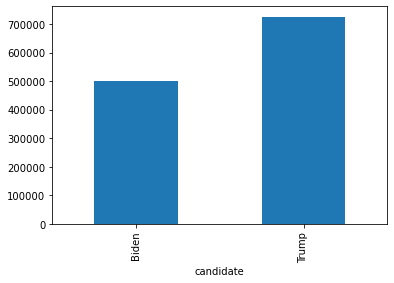

In [19]:
df.groupby('candidate')['likes'].count().plot.bar()

In [22]:
df.country.value_counts()

United States of America    262250
United States                50846
United Kingdom               35946
Germany                      23590
France                       22459
                             ...  
Vanuatu                          2
Turks and Caicos Islands         1
Northern Mariana Islands         1
Saint Lucia                      1
Antigua and Barbuda              1
Name: country, Length: 185, dtype: int64

In [24]:
df['country'][df['country']=='United States'] = 'US'
df['country'][df['country']=='United States of America'] = 'US'

In [25]:
df.country.value_counts()

US                          313096
United Kingdom               35946
Germany                      23590
France                       22459
India                        21891
                             ...  
Tonga                            2
Turks and Caicos Islands         1
Northern Mariana Islands         1
Saint Lucia                      1
Antigua and Barbuda              1
Name: country, Length: 184, dtype: int64

<AxesSubplot:xlabel='country'>

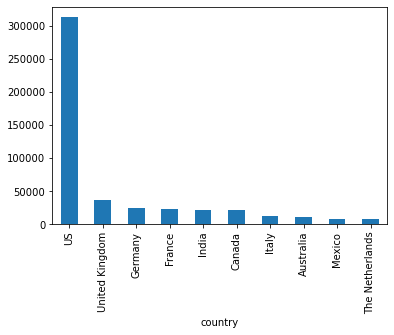

In [26]:
df.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:xlabel='country,candidate'>

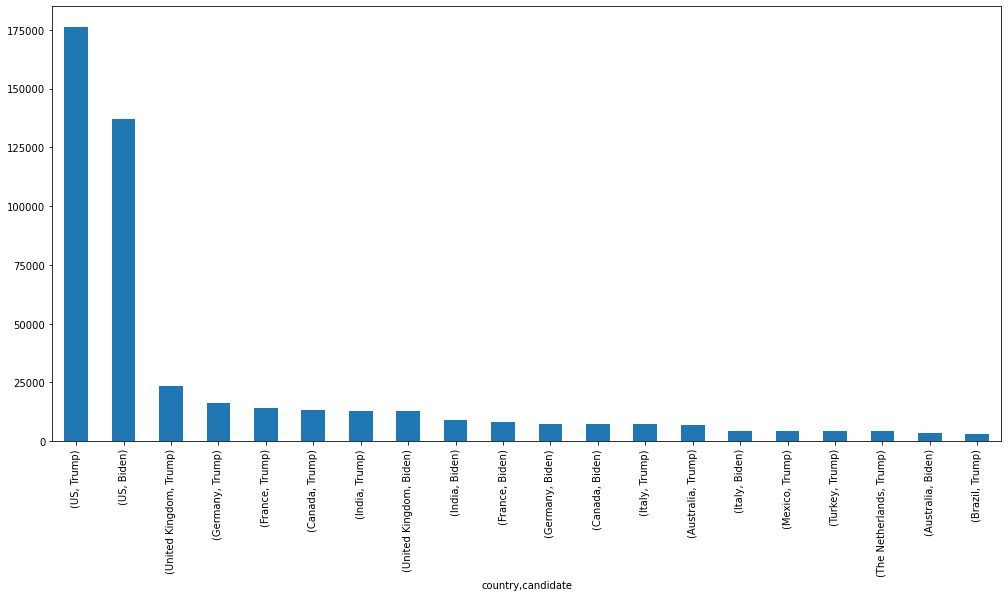

In [32]:
plt.figure(figsize=(17,8))
df.groupby(['country','candidate'])['tweet'].count().sort_values(ascending=False).head(20).plot.bar()

In [35]:
#preprocessing

In [41]:
lm=WordNetLemmatizer()

In [44]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    text = text.replace("  "," ")
    return text

In [45]:
clean("Hi i am Piyush Karmhe and i m going to the market to buy groceries")

'hi piyush karmhe going market buy grocery'

In [46]:
trump_tweets = df.query('(candidate=="Trump")').sort_values("user_followers_count",ascending=False).drop_duplicates(['user_id'])[['tweet','country']]

In [47]:
trump_tweets = trump_tweets.loc[trump_tweets.country=="US"]

In [48]:
trump_tweets.isnull().sum()

tweet      0
country    0
dtype: int64

In [49]:
trump_tweets['cleaned'] = trump_tweets['tweet'].apply(clean) 

In [53]:
trump_tweets

,tweet,country,cleaned
115369,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...
270220,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...
661169,#SethMeyers lambastes Fox News for parroting #...,US,sethmeyers lambastes fox news parroting donald...
693531,📌 Las #noticias más importantes de la mañana: ...,US,la noticias importantes de la ana sigue el con...
566989,#Trump Habla en segundos. Todavía nada está de...,US,trump habla en segundos todav nada est definid...
...,...,...,...
205989,About the #fracking comment last night. Is Jo...,US,fracking comment last night joe biden bidenhar...
462011,Dirty Don trying to cheat at the polls. @realD...,US,dirty trying cheat poll realdonaldtrump donald...
68033,The United States shows more DEATHS than other...,US,united state show death country lamestream fak...
228347,#iamvalued #youarevaued #msc #Trump #trump2020...,US,iamvalued youarevaued msc trump trump seat sti...


In [55]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'        

In [56]:
trump_tweets['subjectivity'] = trump_tweets['cleaned'].apply(getSubjectivity)

In [57]:
trump_tweets['polarity'] = trump_tweets['cleaned'].apply(getPolarity)

In [58]:
trump_tweets['sentiment'] = trump_tweets['polarity'].apply(getAnalysis)

In [59]:
trump_tweets

,tweet,country,cleaned,subjectivity,polarity,sentiment
115369,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...,0.000000,0.00,neutral
270220,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...,0.000000,0.00,neutral
661169,#SethMeyers lambastes Fox News for parroting #...,US,sethmeyers lambastes fox news parroting donald...,0.000000,0.00,neutral
693531,📌 Las #noticias más importantes de la mañana: ...,US,la noticias importantes de la ana sigue el con...,0.000000,0.00,neutral
566989,#Trump Habla en segundos. Todavía nada está de...,US,trump habla en segundos todav nada est definid...,0.000000,0.00,neutral
...,...,...,...,...,...,...
205989,About the #fracking comment last night. Is Jo...,US,fracking comment last night joe biden bidenhar...,0.066667,0.00,neutral
462011,Dirty Don trying to cheat at the polls. @realD...,US,dirty trying cheat poll realdonaldtrump donald...,0.800000,-0.60,negative
68033,The United States shows more DEATHS than other...,US,united state show death country lamestream fak...,0.733333,-0.44,negative
228347,#iamvalued #youarevaued #msc #Trump #trump2020...,US,iamvalued youarevaued msc trump trump seat sti...,0.000000,0.00,neutral


In [60]:
#build a language translator

In [50]:
biden_tweets = df.query('(candidate=="Biden")').sort_values("user_followers_count",ascending=False).drop_duplicates(['user_id'])[['tweet','country']]

In [51]:
biden_tweets = biden_tweets.loc[biden_tweets.country=="US"]

In [52]:
biden_tweets.isnull().sum()

tweet      0
country    0
dtype: int64

In [61]:
biden_tweets['cleaned'] = biden_tweets['tweet'].apply(clean) 

In [62]:
biden_tweets

,tweet,country,cleaned
175650,#JoeBiden is enlisting A-list star power to he...,US,joebiden enlisting list star power help close ...
343145,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,big fight today realdonaldtrump v joebiden got...
459947,#JimmyKimmel offered his view about how the la...,US,jimmykimmel offered view last day gone close r...
493728,Sigue el conteo de votos en #Georgia: #Trump y...,US,sigue el conteo de votos en georgia trump bide...
281536,"Are you there, God? It's me again, Bette. We'r...",US,god bette scared fascist whitehouse racist cri...
...,...,...,...
484098,UNITED WE STAND PEOPLE don’t let the clowns ru...,US,united stand people let clown running presiden...
67722,"@TheJeffBridges And, I voted for the only hono...",US,thejeffbridges voted honorable man running pre...
313770,#2020ElectionPrediction\n\n#Trump wins 300-320...,US,electionprediction trump win electoral vote ma...
42480,The world is sick and needs a hero. I think #b...,US,world sick need hero think biden way towards s...


In [63]:
biden_tweets['subjectivity'] = biden_tweets['cleaned'].apply(getSubjectivity)

In [64]:
biden_tweets['polarity'] = biden_tweets['cleaned'].apply(getPolarity)

In [65]:
biden_tweets['sentiment'] = biden_tweets['polarity'].apply(getAnalysis)

In [66]:
biden_tweets

,tweet,country,cleaned,subjectivity,polarity,sentiment
175650,#JoeBiden is enlisting A-list star power to he...,US,joebiden enlisting list star power help close ...,0.000000,0.000000,neutral
343145,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,big fight today realdonaldtrump v joebiden got...,0.100000,0.000000,neutral
459947,#JimmyKimmel offered his view about how the la...,US,jimmykimmel offered view last day gone close r...,0.066667,0.000000,neutral
493728,Sigue el conteo de votos en #Georgia: #Trump y...,US,sigue el conteo de votos en georgia trump bide...,0.000000,0.000000,neutral
281536,"Are you there, God? It's me again, Bette. We'r...",US,god bette scared fascist whitehouse racist cri...,0.562500,0.100000,positive
...,...,...,...,...,...,...
484098,UNITED WE STAND PEOPLE don’t let the clowns ru...,US,united stand people let clown running presiden...,0.541667,0.083333,positive
67722,"@TheJeffBridges And, I voted for the only hono...",US,thejeffbridges voted honorable man running pre...,0.000000,0.000000,neutral
313770,#2020ElectionPrediction\n\n#Trump wins 300-320...,US,electionprediction trump win electoral vote ma...,0.566667,0.733333,positive
42480,The world is sick and needs a hero. I think #b...,US,world sick need hero think biden way towards s...,0.857143,-0.714286,negative


In [70]:
trump_tweets.sentiment.value_counts(normalize=True)*100

neutral     44.789301
positive    34.625284
negative    20.585415
Name: sentiment, dtype: float64

In [71]:
biden_tweets.sentiment.value_counts(normalize=True)*100

neutral     46.854058
positive    36.827532
negative    16.318410
Name: sentiment, dtype: float64

In [74]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width=1600, height=800,max_font_size=800,max_words=100).generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
    

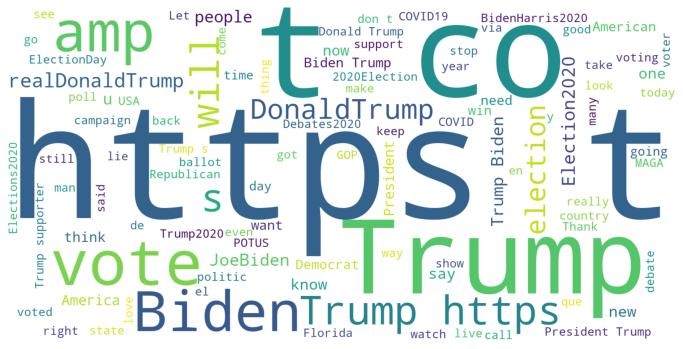

In [75]:
word_cloud(trump_tweets['tweet'][:5000])

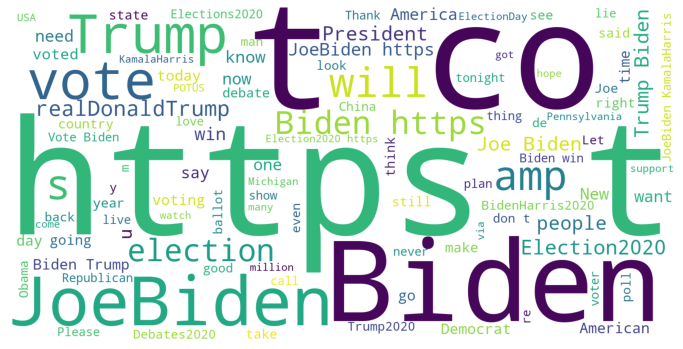

In [76]:
word_cloud(biden_tweets['tweet'][:5000])